In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import h5py
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import scipy.io
os.getcwd()

'C:\\Users\\rahim035\\DNNS_RR'

In [2]:
f = h5py.File("Dic_DPR_land_v2.mat",'r')
list(f.keys())

['X_land_trn_detection',
 'X_land_tst_detection',
 'X_rain_land_trn_retrieval',
 'X_rain_land_tst_retrieval',
 'X_snow_land_trn_retrieval',
 'X_snow_land_tst_retrieval',
 'y_land_trn_detection',
 'y_land_tst_detection',
 'y_rain_land_trn_retrieval',
 'y_rain_land_tst_retrieval',
 'y_snow_land_trn_retrieval',
 'y_snow_land_tst_retrieval']

In [3]:
X0_trn_detection = f['X_land_trn_detection']
y0_trn_detection = f['y_land_trn_detection']
X0_tst_detection = f['X_land_tst_detection']
y0_tst_detection = f['y_land_tst_detection']

X0_rain_trn_retrieval = f['X_rain_land_trn_retrieval']
y0_rain_trn_retrieval = f['y_rain_land_trn_retrieval']
X0_rain_tst_retrieval = f['X_rain_land_tst_retrieval']
y0_rain_tst_retrieval = f['y_rain_land_tst_retrieval']

X0_snow_trn_retrieval = f['X_snow_land_trn_retrieval']
y0_snow_trn_retrieval = f['y_snow_land_trn_retrieval']
X0_snow_tst_retrieval = f['X_snow_land_tst_retrieval']
y0_snow_tst_retrieval = f['y_snow_land_tst_retrieval']

In [4]:
X1_trn_detection = np.transpose(X0_trn_detection)
X1_tst_detection = np.transpose(X0_tst_detection)
y_trn_detection = np.transpose(y0_trn_detection)
y_tst_detection = np.transpose(y0_tst_detection)

X1_rain_trn_retrieval = np.transpose(X0_rain_trn_retrieval)
X1_rain_tst_retrieval = np.transpose(X0_rain_tst_retrieval)
y_rain_trn_retrieval = np.transpose(y0_rain_trn_retrieval)
y_rain_tst_retrieval = np.transpose(y0_rain_tst_retrieval)

X1_snow_trn_retrieval = np.transpose(X0_snow_trn_retrieval)
X1_snow_tst_retrieval = np.transpose(X0_snow_tst_retrieval)
y_snow_trn_retrieval = np.transpose(y0_snow_trn_retrieval)
y_snow_tst_retrieval = np.transpose(y0_snow_tst_retrieval)

In [5]:
#using only kNNs for feratures
#only using 5 nearest neighbor
#X1_snow_trn_retrieval = X1_snow_trn_retrieval[:,:18]
#X1_snow_tst_retrieval = X1_snow_tst_retrieval[:,:18]
#X1_rain_trn_retrieval = X1_rain_trn_retrieval[:,:18]
#X1_rain_tst_retrieval = X1_rain_tst_retrieval[:,:18]

In [5]:
X1_trn_detection.astype('float64')
X1_tst_detection.astype('float64')
y_trn_detection.astype('int64')
y_tst_detection.astype('int64')

X1_rain_trn_retrieval.astype('float64')
X1_rain_tst_retrieval.astype('float64')
y_rain_trn_retrieval.astype('float64')
y_rain_tst_retrieval.astype('float64')

X1_snow_trn_retrieval.astype('float64')
X1_snow_tst_retrieval.astype('float64')
y_snow_trn_retrieval.astype('float64')
y_snow_tst_retrieval.astype('float64');

print('Detection sample size:', len(X1_trn_detection))
print('Rainfall Retrieval sample size:', len(X1_rain_trn_retrieval))
print('Snowfall Retrieval size:', len(X1_snow_trn_retrieval))

Detection sample size: 700000
Rainfall Retrieval sample size: 700000
Snowfall Retrieval size: 700000


In [6]:
mean_detection = X1_trn_detection.mean(axis=0)
X2_trn_detection = X1_trn_detection-mean_detection
std_detection = X1_trn_detection.std(axis=0)
X_trn_detection = X2_trn_detection/std_detection
X2_tst_detection = X1_tst_detection-mean_detection
X_tst_detection = X2_tst_detection/std_detection

mean_rain_retrieval = X1_rain_trn_retrieval.mean(axis=0)
X2_rain_trn_retrieval = X1_rain_trn_retrieval-mean_rain_retrieval
std_rain_retrieval = X1_rain_trn_retrieval.std(axis=0)
X_rain_trn_retrieval = X2_rain_trn_retrieval/std_rain_retrieval
X2_rain_tst_retrieval = X1_rain_tst_retrieval-mean_rain_retrieval
X_rain_tst_retrieval = X2_rain_tst_retrieval/std_rain_retrieval

mean_snow_retrieval = X1_snow_trn_retrieval.mean(axis=0)
X2_snow_trn_retrieval = X1_snow_trn_retrieval-mean_snow_retrieval
std_snow_retrieval = X1_snow_trn_retrieval.std(axis=0)
X_snow_trn_retrieval = X2_snow_trn_retrieval/std_snow_retrieval
X2_snow_tst_retrieval = X1_snow_tst_retrieval-mean_snow_retrieval
X_snow_tst_retrieval = X2_snow_tst_retrieval/std_snow_retrieval

In [7]:
x_snow_lb = 0.01 #np.percentile(y_snow_trn_retrieval,0.05)
x_snow_ub = np.percentile(y_snow_trn_retrieval,99.95)

x_rain_lb = 0.01 #np.percentile(y_rain_trn_retrieval,0.05)
x_rain_ub = np.percentile(y_rain_trn_retrieval,99.975)

mask_trn_snow = (y_snow_trn_retrieval>=x_snow_lb) & (y_snow_trn_retrieval<=x_snow_ub)
m_trn_snow=mask_trn_snow[:,0]
mask_tst_snow = (y_snow_tst_retrieval>=x_snow_lb) & (y_snow_tst_retrieval<=x_snow_ub)
m_tst_snow=mask_tst_snow[:,0]

mask_trn_rain = (y_rain_trn_retrieval>=x_rain_lb) & (y_rain_trn_retrieval<=x_rain_ub)
m_trn_rain=mask_trn_rain[:,0]
mask_tst_rain = (y_rain_tst_retrieval>=x_rain_lb) & (y_rain_tst_retrieval<=x_rain_ub)
m_tst_rain=mask_tst_rain[:,0]

Xf_snow_trn_detection = np.delete(X_trn_detection, ~m_trn_snow, axis=0)
yf_snow_trn_detection = np.delete(y_trn_detection, ~m_trn_snow, axis=0)
Xf_snow_tst_detection = np.delete(X_tst_detection, ~m_tst_snow, axis=0)
yf_snow_tst_detection = np.delete(y_tst_detection, ~m_tst_snow, axis=0)

Xf_snow_trn_retrieval = np.delete(X_snow_trn_retrieval, ~m_trn_snow, axis=0)
yf_snow_trn_retrieval = np.delete(y_snow_trn_retrieval, ~m_trn_snow, axis=0)
Xf_snow_tst_retrieval = np.delete(X_snow_tst_retrieval, ~m_tst_snow, axis=0)
yf_snow_tst_retrieval = np.delete(y_snow_tst_retrieval, ~m_tst_snow, axis=0)

Xf_rain_trn_detection = np.delete(X_trn_detection, ~m_trn_rain, axis=0)
yf_rain_trn_detection = np.delete(y_trn_detection, ~m_trn_rain, axis=0)
Xf_rain_tst_detection = np.delete(X_tst_detection, ~m_tst_rain, axis=0)
yf_rain_tst_detection = np.delete(y_tst_detection, ~m_tst_rain, axis=0)

Xf_rain_trn_retrieval = np.delete(X_rain_trn_retrieval, ~m_trn_rain, axis=0)
yf_rain_trn_retrieval = np.delete(y_rain_trn_retrieval, ~m_trn_rain, axis=0)
Xf_rain_tst_retrieval = np.delete(X_rain_tst_retrieval, ~m_tst_rain, axis=0)
yf_rain_tst_retrieval = np.delete(y_rain_tst_retrieval, ~m_tst_rain, axis=0)

x_snow_lb, x_snow_ub, x_rain_lb, x_rain_ub

(0.01, 7.3120760111822705, 0.01, 62.83852767944336)

In [8]:
X1_rain_trn_retrieval.shape

(700000, 33)

In [9]:
print('***Training Dataset:\n')

n_snow=1
n_rain=1
n_clear=1  
t_train = np.zeros([y_trn_detection.shape[0],1])

for i in range(len(X_trn_detection)):
    label = y_trn_detection[i]
    if label==1:
        n_snow+=1
        t_train[i]=2
    if label==2:
        n_rain+=1  
        t_train[i]=1
    if label==3:
        n_clear+=1
        t_train[i]=0
        
print('Num. of snowfall:',n_snow)
print('Num. of rainfall:',n_rain)
print('Num. of clear-sky:',n_clear)

print('\n***Testing Dataset:\n')

n_snow=1
n_rain=1
n_clear=1  
t_test = np.zeros([y_tst_detection.shape[0],1])

for i in range(len(X_tst_detection)):
    label = y_tst_detection[i]
    if label==1:
        n_snow+=1
        t_test[i]=2
    if label==2:
        n_rain+=1  
        t_test[i]=1
    if label==3:
        n_clear+=1
        t_test[i]=0
        
print('Num. of snowfall:',n_snow)
print('Num. of rainfall:',n_rain)
print('Num. of clear-sky:',n_clear)

***Training Dataset:

Num. of snowfall: 175234
Num. of rainfall: 175879
Num. of clear-sky: 348890

***Testing Dataset:

Num. of snowfall: 75190
Num. of rainfall: 75071
Num. of clear-sky: 149742


In [10]:
print('\n***Truth Checking - Rain:\n')

n_snow=1
n_rain=1
n_clear=1  
tf_test_rain = np.zeros([yf_rain_tst_detection.shape[0],1])

for i in range(len(Xf_rain_tst_detection)):
    label = yf_rain_tst_detection[i]
    if label==1:
        n_snow+=1
        tf_test_rain[i]=2
    if label==2:
        n_rain+=1  
        tf_test_rain[i]=1
    if label==3:
        n_clear+=1
        tf_test_rain[i]=0
        
print('Num. of snowfall:',n_snow)
print('Num. of rainfall:',n_rain)
print('Num. of clear-sky:',n_clear)

print('\n***Truth Checking - Snow:\n')

n_snow=1
n_rain=1
n_clear=1  
tf_test_snow = np.zeros([yf_snow_tst_detection.shape[0],1])

for i in range(len(Xf_snow_tst_detection)):
    label = yf_snow_tst_detection[i]
    if label==1:
        n_snow+=1
        tf_test_snow[i]=2
    if label==2:
        n_rain+=1  
        tf_test_snow[i]=1
    if label==3:
        n_clear+=1
        tf_test_snow[i]=0
        
print('Num. of snowfall:',n_snow)
print('Num. of rainfall:',n_rain)
print('Num. of clear-sky:',n_clear)


***Truth Checking - Rain:

Num. of snowfall: 1
Num. of rainfall: 74995
Num. of clear-sky: 1

***Truth Checking - Snow:

Num. of snowfall: 75044
Num. of rainfall: 1
Num. of clear-sky: 1


In [11]:
from tensorflow.keras.utils import to_categorical

t_trn_detection = to_categorical(t_train)
t_tst_detection = to_categorical(t_test)

# DNN - Detection Module

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import layers, Sequential

In [13]:
# Parameters
hidden_units = 30
dropout = 0

# Detection Module
model_detection = Sequential()

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(hidden_units))
model_detection.add(Activation('relu'))
model_detection.add(Dropout(dropout))

model_detection.add(Dense(3))
model_detection.add(Activation('softmax'))

In [14]:
model_detection.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics= [tf.keras.metrics.Recall()])

In [15]:
from tensorflow import keras
callbacks_list = [
#     keras.callbacks.EarlyStopping(
#     monitor="val_loss",
#     patience=25,),
    keras.callbacks.ModelCheckpoint(
    filepath="checkpoint_path.keras",
    monitor="val_loss",
    save_best_only=True,
    )    
]

In [16]:
print('\nFitting DNN (Detection Module):\n')
batch_size1 = 1800
history_detection = model_detection.fit(X_trn_detection, t_trn_detection, epochs=300,
                                validation_split=.2, batch_size = batch_size1,
                                callbacks=callbacks_list, verbose=1)


Fitting DNN (Detection Module):

Epoch 1/300
312/312 [==============================] - 1s 4ms/step - loss: 0.8027 - recall: 0.3639 - val_loss: 0.5350 - val_recall: 0.7276
Epoch 2/300
312/312 [==============================] - 1s 3ms/step - loss: 0.4242 - recall: 0.8072 - val_loss: 0.3709 - val_recall: 0.8399
Epoch 3/300
312/312 [==============================] - 1s 4ms/step - loss: 0.3404 - recall: 0.8548 - val_loss: 0.3207 - val_recall: 0.8638
Epoch 4/300
312/312 [==============================] - 1s 3ms/step - loss: 0.3000 - recall: 0.8732 - val_loss: 0.2893 - val_recall: 0.8792
Epoch 5/300
312/312 [==============================] - 1s 3ms/step - loss: 0.2748 - recall: 0.8852 - val_loss: 0.2718 - val_recall: 0.8860
Epoch 6/300
312/312 [==============================] - 1s 3ms/step - loss: 0.2594 - recall: 0.8931 - val_loss: 0.2653 - val_recall: 0.8923
Epoch 7/300
312/312 [==============================] - 1s 3ms/step - loss: 0.2492 - recall: 0.8979 - val_loss: 0.2507 - val_recall: 

312/312 [==============================] - 1s 3ms/step - loss: 0.2015 - recall: 0.9200 - val_loss: 0.2146 - val_recall: 0.9144
Epoch 60/300
312/312 [==============================] - 1s 3ms/step - loss: 0.2013 - recall: 0.9202 - val_loss: 0.2077 - val_recall: 0.9173
Epoch 61/300
312/312 [==============================] - 1s 3ms/step - loss: 0.2012 - recall: 0.9203 - val_loss: 0.2033 - val_recall: 0.9194
Epoch 62/300
312/312 [==============================] - 1s 3ms/step - loss: 0.2010 - recall: 0.9205 - val_loss: 0.2057 - val_recall: 0.9183
Epoch 63/300
312/312 [==============================] - 1s 3ms/step - loss: 0.2008 - recall: 0.9204 - val_loss: 0.2031 - val_recall: 0.9196
Epoch 64/300
312/312 [==============================] - 1s 3ms/step - loss: 0.2007 - recall: 0.9206 - val_loss: 0.2102 - val_recall: 0.9162
Epoch 65/300
312/312 [==============================] - 1s 3ms/step - loss: 0.2006 - recall: 0.9205 - val_loss: 0.2047 - val_recall: 0.9185
Epoch 66/300
312/312 [===========

312/312 [==============================] - 1s 3ms/step - loss: 0.1953 - recall: 0.9229 - val_loss: 0.2047 - val_recall: 0.9184
Epoch 118/300
312/312 [==============================] - 1s 3ms/step - loss: 0.1952 - recall: 0.9229 - val_loss: 0.2049 - val_recall: 0.9186
Epoch 119/300
312/312 [==============================] - 1s 3ms/step - loss: 0.1952 - recall: 0.9228 - val_loss: 0.2075 - val_recall: 0.9174
Epoch 120/300
312/312 [==============================] - 1s 3ms/step - loss: 0.1951 - recall: 0.9230 - val_loss: 0.2013 - val_recall: 0.9200
Epoch 121/300
312/312 [==============================] - 1s 3ms/step - loss: 0.1950 - recall: 0.9230 - val_loss: 0.1983 - val_recall: 0.9216
Epoch 122/300
312/312 [==============================] - 1s 3ms/step - loss: 0.1951 - recall: 0.9228 - val_loss: 0.2007 - val_recall: 0.9204
Epoch 123/300
312/312 [==============================] - 1s 3ms/step - loss: 0.1949 - recall: 0.9231 - val_loss: 0.1980 - val_recall: 0.9216
Epoch 124/300
312/312 [====

312/312 [==============================] - 1s 3ms/step - loss: 0.1923 - recall: 0.9239 - val_loss: 0.1957 - val_recall: 0.9226
Epoch 176/300
312/312 [==============================] - 1s 3ms/step - loss: 0.1923 - recall: 0.9240 - val_loss: 0.1976 - val_recall: 0.9214
Epoch 177/300
312/312 [==============================] - 1s 3ms/step - loss: 0.1923 - recall: 0.9240 - val_loss: 0.2022 - val_recall: 0.9194
Epoch 178/300
312/312 [==============================] - 1s 3ms/step - loss: 0.1923 - recall: 0.9239 - val_loss: 0.2028 - val_recall: 0.9195
Epoch 179/300
312/312 [==============================] - 1s 3ms/step - loss: 0.1922 - recall: 0.9239 - val_loss: 0.1973 - val_recall: 0.9218
Epoch 180/300
312/312 [==============================] - 1s 3ms/step - loss: 0.1921 - recall: 0.9241 - val_loss: 0.1985 - val_recall: 0.9214
Epoch 181/300
312/312 [==============================] - 1s 3ms/step - loss: 0.1921 - recall: 0.9241 - val_loss: 0.2026 - val_recall: 0.9197
Epoch 182/300
312/312 [====

312/312 [==============================] - 1s 3ms/step - loss: 0.1902 - recall: 0.9247 - val_loss: 0.1955 - val_recall: 0.9224
Epoch 234/300
312/312 [==============================] - 1s 3ms/step - loss: 0.1902 - recall: 0.9248 - val_loss: 0.1960 - val_recall: 0.9224
Epoch 235/300
312/312 [==============================] - 1s 3ms/step - loss: 0.1902 - recall: 0.9248 - val_loss: 0.2033 - val_recall: 0.9187
Epoch 236/300
312/312 [==============================] - 1s 3ms/step - loss: 0.1901 - recall: 0.9246 - val_loss: 0.1952 - val_recall: 0.9226
Epoch 237/300
312/312 [==============================] - 1s 3ms/step - loss: 0.1902 - recall: 0.9247 - val_loss: 0.1943 - val_recall: 0.9227
Epoch 238/300
312/312 [==============================] - 1s 3ms/step - loss: 0.1901 - recall: 0.9248 - val_loss: 0.1962 - val_recall: 0.9217
Epoch 239/300
312/312 [==============================] - 1s 3ms/step - loss: 0.1901 - recall: 0.9247 - val_loss: 0.2023 - val_recall: 0.9189
Epoch 240/300
312/312 [====

312/312 [==============================] - 1s 3ms/step - loss: 0.1888 - recall: 0.9252 - val_loss: 0.1930 - val_recall: 0.9231
Epoch 292/300
312/312 [==============================] - 1s 3ms/step - loss: 0.1887 - recall: 0.9253 - val_loss: 0.1927 - val_recall: 0.9237
Epoch 293/300
312/312 [==============================] - 1s 3ms/step - loss: 0.1886 - recall: 0.9253 - val_loss: 0.1978 - val_recall: 0.9217
Epoch 294/300
312/312 [==============================] - 1s 3ms/step - loss: 0.1886 - recall: 0.9252 - val_loss: 0.1932 - val_recall: 0.9235
Epoch 295/300
312/312 [==============================] - 1s 3ms/step - loss: 0.1886 - recall: 0.9254 - val_loss: 0.1938 - val_recall: 0.9233
Epoch 296/300
312/312 [==============================] - 1s 3ms/step - loss: 0.1886 - recall: 0.9252 - val_loss: 0.1924 - val_recall: 0.9236
Epoch 297/300
312/312 [==============================] - 1s 3ms/step - loss: 0.1885 - recall: 0.9253 - val_loss: 0.1940 - val_recall: 0.9233
Epoch 298/300
312/312 [====

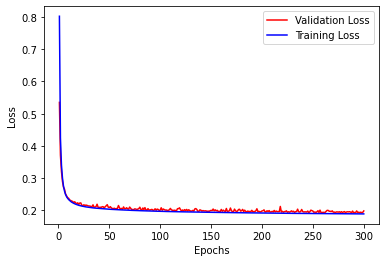

In [17]:
val_loss = history_detection.history["val_loss"]
loss = history_detection.history["loss"]

epochs = range(1, 301)
plt.plot(epochs, val_loss[:], "r-",
label="Validation Loss")
plt.plot(epochs, loss[:], "b-",
label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [18]:
predictions_label = model_detection.predict(X_tst_detection)
predictions_label_rain = model_detection.predict(Xf_rain_tst_detection)
predictions_label_snow = model_detection.predict(Xf_snow_tst_detection)

In [19]:
y_pred = np.zeros([len(X_tst_detection),1])
for i in range(len(X_tst_detection)):
    y_pred[i,0] = np.argmax(predictions_label[i])
    
y_pred_rain = np.zeros([len(Xf_rain_tst_detection),1])
for i in range(len(Xf_rain_tst_detection)):
    y_pred_rain[i,0] = np.argmax(predictions_label_rain[i])
    
y_pred_snow = np.zeros([len(Xf_snow_tst_detection),1])
for i in range(len(Xf_snow_tst_detection)):
    y_pred_snow[i,0] = np.argmax(predictions_label_snow[i])    

### Metrics

In [20]:
### Detection Module

n_cc=1
n_cs=1
n_cr=1
n_sc=1
n_ss=1
n_sr=1
n_rc=1
n_rs=1
n_rr=1

precip_c= 3
precip_r= 2
precip_s= 1

for i in range(len(X_tst_detection)):
    label_predict = y_pred[i]
    label_actual = t_test[i]
    if label_predict==precip_c and label_actual==precip_c:
        n_cc+=1
    if label_predict==precip_s and label_actual==precip_s:
        n_ss+=1
    if label_predict==precip_r and label_actual==precip_r:
        n_rr+=1 
    if label_predict==precip_c and label_actual==precip_s:
        n_cs+=1
    if label_predict==precip_c and label_actual==precip_r:
        n_cr+=1
    if label_predict==precip_s and label_actual==precip_c:
        n_sc+=1
    if label_predict==precip_s and label_actual==precip_r:
        n_sr+=1  
    if label_predict==precip_r and label_actual==precip_c:
        n_rc+=1
    if label_predict==precip_r and label_actual==precip_s:
        n_rs+=1        
        
#Snow
TP_s = n_ss
TN_s = n_cc+n_cr+n_rc+n_rr
FP_s = n_sc+n_sr
FN_s = n_cs+n_rs

precision_s = TP_s/(TP_s+FP_s)
acc_s = (TP_s+TN_s)/(TP_s+TN_s+FP_s+FN_s)
recall_s = TP_s/(TP_s+FN_s)
f1_score_s = (2*precision_s*recall_s)/(precision_s+recall_s)
FPR_s = FP_s/(FP_s+TN_s)

#Rain
TP_r = n_rr
TN_r = n_cc+n_cs+n_sc+n_ss
FP_r = n_rc+n_rs
FN_r = n_cr+n_sr

precision_r = TP_r/(TP_r+FP_r)
acc_r = (TP_r+TN_r)/(TP_r+TN_r+FP_r+FN_r)
recall_r = TP_r/(TP_r+FN_r)
f1_score_r = (2*precision_r*recall_r)/(precision_r+recall_r)
FPR_r = FP_r/(FP_r+TN_r) 

print('\n For Rainfall Detection Over Land:\n')
print('Precision: ',precision_r)
print('Accuracy: ',acc_r)
print('Recall (TPR): ',recall_r)
print('False Alarm (FPR): ',FPR_r)
print('\nF1 Score: ',f1_score_r)

print('----------------------------')
print('\n For Snwofall Detection Over Land:\n')
print('Precision: ',precision_s)
print('Accuracy: ',acc_s)
print('Recall (TPR): ',recall_s)
print('False Alarm (FPR): ',FPR_s)
print('\nF1 Score: ',f1_score_s)

#Model
TP = n_cc+n_ss+n_rr
FP = n_cs+n_cr+n_sc+n_sr+n_rc+n_rs
FN = n_sc+n_rc+n_cs+n_rs+n_cr+n_sr

precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = (2*precision*recall)/(precision+recall)

print('----------------------------')
print('\n For Model Detection Over Land:\n')
print('Precision: ',precision)
print('Recall (TPR): ',recall)
print('\nF1 Score: ',f1_score)


 For Rainfall Detection Over Land:

Precision:  0.9620453637778359
Accuracy:  0.9665833724494022
Recall (TPR):  0.9710183203135859
False Alarm (FPR):  0.037791734086608346

F1 Score:  0.9665110165680882
----------------------------

 For Snwofall Detection Over Land:

Precision:  0.9711426673310082
Accuracy:  0.9665833724494022
Recall (TPR):  0.9622067111885139
False Alarm (FPR):  0.028980471193272638

F1 Score:  0.9666540382297226
----------------------------

 For Model Detection Over Land:

Precision:  0.9665695667780324
Recall (TPR):  0.9665695667780324

F1 Score:  0.9665695667780324


In [21]:
model_detection.evaluate(X_tst_detection, t_tst_detection, batch_size = batch_size1)

167/167 [==============================] - 0s 1ms/step - loss: 0.1982 - recall: 0.9209


[0.19818870723247528, 0.9209333062171936]

# DNN - Retrieval Module

In [22]:
from tensorflow.keras import backend
def root_mean_squared_error(y_true, y_pred):
        return backend.sqrt(backend.mean(backend.square(y_pred-y_true)))
    
def mean_absolute_error(y_true, y_pred):
        return backend.mean(backend.abs(y_pred-y_true))        

## Snow

In [47]:
del model_retrieval_snow,history_retrieval_snow

In [23]:
# Parameters
hidden_units = 75
dropout = 0

# LAND
model_retrieval_snow = Sequential()

model_retrieval_snow.add(Dense(hidden_units))
model_retrieval_snow.add(Activation('relu'))
model_retrieval_snow.add(Dropout(dropout))

model_retrieval_snow.add(Dense(hidden_units))
model_retrieval_snow.add(Activation('relu'))
model_retrieval_snow.add(Dropout(dropout))

model_retrieval_snow.add(Dense(hidden_units))
model_retrieval_snow.add(Activation('relu'))
model_retrieval_snow.add(Dropout(dropout))

model_retrieval_snow.add(Dense(hidden_units))
model_retrieval_snow.add(Activation('relu'))
model_retrieval_snow.add(Dropout(dropout))


model_retrieval_snow.add(Dense(1))
model_retrieval_snow.add(Activation('relu'))

In [24]:
model_retrieval_snow.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00001),
              loss = root_mean_squared_error,
              metrics= mean_absolute_error)

In [25]:
from tensorflow import keras
callbacks_list = [
    keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=25,),
    keras.callbacks.ModelCheckpoint(
    filepath="checkpoint_path.keras",
    monitor="val_loss",
    mode="min",
    save_best_only=True,
    )    
]

In [26]:
print('\nFitting DNN (Retrieval Module - Snow):\n')
batch_size2 = 600
history_retrieval_snow = model_retrieval_snow.fit(Xf_snow_trn_retrieval, yf_snow_trn_retrieval, epochs=500,
                                validation_split=.2, batch_size = batch_size2,
                                callbacks=callbacks_list, verbose=1)


Fitting DNN (Retrieval Module - Snow):

Epoch 1/500
234/234 [==============================] - 1s 3ms/step - loss: 0.8969 - mean_absolute_error: 0.7028 - val_loss: 0.8487 - val_mean_absolute_error: 0.6421
Epoch 2/500
234/234 [==============================] - 1s 3ms/step - loss: 0.7594 - mean_absolute_error: 0.5387 - val_loss: 0.6773 - val_mean_absolute_error: 0.4477
Epoch 3/500
234/234 [==============================] - 1s 2ms/step - loss: 0.6305 - mean_absolute_error: 0.3950 - val_loss: 0.6032 - val_mean_absolute_error: 0.3669
Epoch 4/500
234/234 [==============================] - 1s 2ms/step - loss: 0.5896 - mean_absolute_error: 0.3516 - val_loss: 0.5818 - val_mean_absolute_error: 0.3447
Epoch 5/500
234/234 [==============================] - 1s 2ms/step - loss: 0.5709 - mean_absolute_error: 0.3343 - val_loss: 0.5660 - val_mean_absolute_error: 0.3314
Epoch 6/500
234/234 [==============================] - 1s 2ms/step - loss: 0.5566 - mean_absolute_error: 0.3232 - val_loss: 0.5525 - v

234/234 [==============================] - 0s 2ms/step - loss: 0.4821 - mean_absolute_error: 0.2885 - val_loss: 0.4829 - val_mean_absolute_error: 0.2900
Epoch 51/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4823 - mean_absolute_error: 0.2885 - val_loss: 0.4828 - val_mean_absolute_error: 0.2901
Epoch 52/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4822 - mean_absolute_error: 0.2884 - val_loss: 0.4826 - val_mean_absolute_error: 0.2887
Epoch 53/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4820 - mean_absolute_error: 0.2883 - val_loss: 0.4825 - val_mean_absolute_error: 0.2882
Epoch 54/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4815 - mean_absolute_error: 0.2881 - val_loss: 0.4823 - val_mean_absolute_error: 0.2883
Epoch 55/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4812 - mean_absolute_error: 0.2879 - val_loss: 0.4822 - val_mean_absolute_error: 0.2887
Epoch 56/500
234/

234/234 [==============================] - 0s 2ms/step - loss: 0.4760 - mean_absolute_error: 0.2847 - val_loss: 0.4786 - val_mean_absolute_error: 0.2867
Epoch 100/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4763 - mean_absolute_error: 0.2848 - val_loss: 0.4786 - val_mean_absolute_error: 0.2882
Epoch 101/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4766 - mean_absolute_error: 0.2853 - val_loss: 0.4785 - val_mean_absolute_error: 0.2869
Epoch 102/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4756 - mean_absolute_error: 0.2846 - val_loss: 0.4785 - val_mean_absolute_error: 0.2870
Epoch 103/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4762 - mean_absolute_error: 0.2846 - val_loss: 0.4784 - val_mean_absolute_error: 0.2857
Epoch 104/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4763 - mean_absolute_error: 0.2844 - val_loss: 0.4784 - val_mean_absolute_error: 0.2878
Epoch 105/50

234/234 [==============================] - 0s 2ms/step - loss: 0.4721 - mean_absolute_error: 0.2826 - val_loss: 0.4768 - val_mean_absolute_error: 0.2858
Epoch 149/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4726 - mean_absolute_error: 0.2829 - val_loss: 0.4768 - val_mean_absolute_error: 0.2861
Epoch 150/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4726 - mean_absolute_error: 0.2827 - val_loss: 0.4768 - val_mean_absolute_error: 0.2866
Epoch 151/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4722 - mean_absolute_error: 0.2827 - val_loss: 0.4768 - val_mean_absolute_error: 0.2860
Epoch 152/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4725 - mean_absolute_error: 0.2828 - val_loss: 0.4767 - val_mean_absolute_error: 0.2856
Epoch 153/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4727 - mean_absolute_error: 0.2827 - val_loss: 0.4768 - val_mean_absolute_error: 0.2863
Epoch 154/50

234/234 [==============================] - 0s 2ms/step - loss: 0.4702 - mean_absolute_error: 0.2817 - val_loss: 0.4762 - val_mean_absolute_error: 0.2836
Epoch 198/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4704 - mean_absolute_error: 0.2817 - val_loss: 0.4762 - val_mean_absolute_error: 0.2854
Epoch 199/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4698 - mean_absolute_error: 0.2815 - val_loss: 0.4762 - val_mean_absolute_error: 0.2858
Epoch 200/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4698 - mean_absolute_error: 0.2819 - val_loss: 0.4761 - val_mean_absolute_error: 0.2845
Epoch 201/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4701 - mean_absolute_error: 0.2816 - val_loss: 0.4761 - val_mean_absolute_error: 0.2858
Epoch 202/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4701 - mean_absolute_error: 0.2817 - val_loss: 0.4761 - val_mean_absolute_error: 0.2844
Epoch 203/50

234/234 [==============================] - 0s 2ms/step - loss: 0.4682 - mean_absolute_error: 0.2809 - val_loss: 0.4759 - val_mean_absolute_error: 0.2852
Epoch 247/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4683 - mean_absolute_error: 0.2809 - val_loss: 0.4759 - val_mean_absolute_error: 0.2837
Epoch 248/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4680 - mean_absolute_error: 0.2807 - val_loss: 0.4759 - val_mean_absolute_error: 0.2851
Epoch 249/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4682 - mean_absolute_error: 0.2807 - val_loss: 0.4759 - val_mean_absolute_error: 0.2840
Epoch 250/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4680 - mean_absolute_error: 0.2805 - val_loss: 0.4759 - val_mean_absolute_error: 0.2846
Epoch 251/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4680 - mean_absolute_error: 0.2807 - val_loss: 0.4761 - val_mean_absolute_error: 0.2869
Epoch 252/50

234/234 [==============================] - 0s 2ms/step - loss: 0.4661 - mean_absolute_error: 0.2802 - val_loss: 0.4758 - val_mean_absolute_error: 0.2835
Epoch 296/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4663 - mean_absolute_error: 0.2797 - val_loss: 0.4758 - val_mean_absolute_error: 0.2839
Epoch 297/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4661 - mean_absolute_error: 0.2800 - val_loss: 0.4758 - val_mean_absolute_error: 0.2844
Epoch 298/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4665 - mean_absolute_error: 0.2798 - val_loss: 0.4758 - val_mean_absolute_error: 0.2836
Epoch 299/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4659 - mean_absolute_error: 0.2800 - val_loss: 0.4759 - val_mean_absolute_error: 0.2855
Epoch 300/500
234/234 [==============================] - 0s 2ms/step - loss: 0.4660 - mean_absolute_error: 0.2800 - val_loss: 0.4758 - val_mean_absolute_error: 0.2851
Epoch 301/50

In [27]:
Xf_snow_trn_retrieval.shape

(174883, 33)

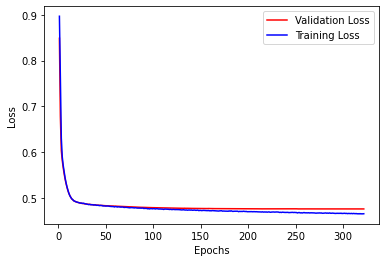

In [28]:
val_loss = history_retrieval_snow.history["val_loss"]
loss = history_retrieval_snow.history["loss"]

epochs = range(1, 323)
plt.plot(epochs, val_loss[:], "r-",
label="Validation Loss")
plt.plot(epochs, loss[:], "b-",
label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [29]:
predictions_snow = model_retrieval_snow.predict(Xf_snow_tst_retrieval)

### Evaluation

In [30]:
model_retrieval_snow.evaluate(Xf_snow_tst_retrieval, yf_snow_tst_retrieval, batch_size = batch_size2)

126/126 [==============================] - 0s 554us/step - loss: 0.4800 - mean_absolute_error: 0.2873


[0.4800403118133545, 0.2872605323791504]

# Checking Outputs

In [ ]:
print('shape label', len(y_pred))
print('shape estimate', len(predictions_snow))

In [31]:
idx_SR_TPR = (yf_snow_tst_retrieval>0) & (predictions_snow>0) 
mask_TP= idx_SR_TPR[:,0]

In [32]:
from scipy.stats import gaussian_kde
x = yf_snow_tst_retrieval
y = predictions_snow
#idx_snow = (x>0) & (y>0)
#mask_TP=idx_snow[:,0]
y = np.delete(y, ~mask_TP)
x = np.delete(x, ~mask_TP)
xy = np.vstack([np.log(x),np.log(y)])
z = gaussian_kde(xy)(xy)

In [24]:
rmse = np.sqrt(np.mean(np.square(x-y)))
mae = np.mean(np.abs(x-y))
bias = np.sum(y-x)/len(x)
print('RMSE snow:', rmse, 'mm/hr')
print('MAE snow:', mae, 'mm/hr')
print('bias snow:', bias, 'mm/hr')

RMSE snow: 0.4114331653048548 mm/hr
MAE snow: 0.2715786060770732 mm/hr
bias snow: 0.007988484959059315 mm/hr


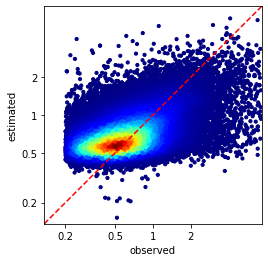

In [33]:
fig, ax = plt.subplots()
ax.scatter(np.log(x), np.log(y), c=z, s=10, cmap= 'jet')
plt.plot([-2, 2], [-2, 2],"r--")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect('equal', adjustable='box')
ax.set_xticks([np.log(0.2), np.log(0.5), np.log(1), np.log(2)])
ax.set_xticklabels(['0.2','0.5', '1', '2'])
ax.set_yticks([np.log(0.2), np.log(0.5), np.log(1), np.log(2)])
ax.set_yticklabels(['0.2','0.5', '1', '2'])
plt.xlabel("observed")
plt.ylabel("estimated")
plt.show()

## Rain

In [27]:
del model_retrieval_rain,history_retrieval_rain

In [105]:
# Parameters
hidden_units = 75
dropout = 0

# LAND
model_retrieval_rain = Sequential()

model_retrieval_rain.add(Dense(hidden_units))
model_retrieval_rain.add(Activation('relu'))
model_retrieval_rain.add(Dropout(dropout))

model_retrieval_rain.add(Dense(hidden_units))
model_retrieval_rain.add(Activation('relu'))
model_retrieval_rain.add(Dropout(dropout))

model_retrieval_rain.add(Dense(hidden_units))
model_retrieval_rain.add(Activation('relu'))
model_retrieval_rain.add(Dropout(dropout))

model_retrieval_rain.add(Dense(hidden_units))
model_retrieval_rain.add(Activation('relu'))
model_retrieval_rain.add(Dropout(dropout))

model_retrieval_rain.add(Dense(1))
model_retrieval_rain.add(Activation('relu'))

In [106]:
model_retrieval_rain.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00001),
              loss = mean_absolute_error,
              metrics= root_mean_squared_error)

In [107]:
from tensorflow import keras
callbacks_list = [
    keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=25,),
    keras.callbacks.ModelCheckpoint(
    filepath="checkpoint_path.keras",
    monitor="val_loss",
    mode="min",
    save_best_only=True,
    )    
]

In [108]:
X_rain_trn_retrieval.shape

(700000, 33)

In [109]:
print('\nFitting DNN (Retrieval Module - Rain):\n')
batch_size2 = 600
history_retrieval_rain = model_retrieval_rain.fit(Xf_rain_trn_retrieval, yf_rain_trn_retrieval, epochs=800,
                                validation_split=.2, batch_size = batch_size2,
                                callbacks=callbacks_list, verbose=1)


Fitting DNN (Retrieval Module - Rain):

Epoch 1/800
235/235 [==============================] - 1s 2ms/step - loss: 1.9639 - root_mean_squared_error: 4.1201 - val_loss: 1.8044 - val_root_mean_squared_error: 3.9772
Epoch 2/800
235/235 [==============================] - 0s 2ms/step - loss: 1.6171 - root_mean_squared_error: 3.7729 - val_loss: 1.4963 - val_root_mean_squared_error: 3.6213
Epoch 3/800
235/235 [==============================] - 0s 2ms/step - loss: 1.4312 - root_mean_squared_error: 3.4966 - val_loss: 1.4109 - val_root_mean_squared_error: 3.4336
Epoch 4/800
235/235 [==============================] - 1s 2ms/step - loss: 1.3857 - root_mean_squared_error: 3.3993 - val_loss: 1.3811 - val_root_mean_squared_error: 3.3747
Epoch 5/800
235/235 [==============================] - 1s 2ms/step - loss: 1.3605 - root_mean_squared_error: 3.3576 - val_loss: 1.3569 - val_root_mean_squared_error: 3.3447
Epoch 6/800
235/235 [==============================] - 0s 2ms/step - loss: 1.3379 - root_mean_

Epoch 48/800
235/235 [==============================] - 0s 2ms/step - loss: 1.2074 - root_mean_squared_error: 3.1470 - val_loss: 1.2038 - val_root_mean_squared_error: 3.1097
Epoch 49/800
235/235 [==============================] - 0s 2ms/step - loss: 1.2068 - root_mean_squared_error: 3.1396 - val_loss: 1.2028 - val_root_mean_squared_error: 3.1072
Epoch 50/800
235/235 [==============================] - 0s 2ms/step - loss: 1.2062 - root_mean_squared_error: 3.1373 - val_loss: 1.2023 - val_root_mean_squared_error: 3.1058
Epoch 51/800
235/235 [==============================] - 0s 2ms/step - loss: 1.2056 - root_mean_squared_error: 3.1376 - val_loss: 1.2018 - val_root_mean_squared_error: 3.1050
Epoch 52/800
235/235 [==============================] - 0s 2ms/step - loss: 1.2050 - root_mean_squared_error: 3.1411 - val_loss: 1.2011 - val_root_mean_squared_error: 3.1019
Epoch 53/800
235/235 [==============================] - 0s 2ms/step - loss: 1.2044 - root_mean_squared_error: 3.1277 - val_loss: 1

235/235 [==============================] - 0s 2ms/step - loss: 1.1871 - root_mean_squared_error: 3.1371 - val_loss: 1.1854 - val_root_mean_squared_error: 3.1023
Epoch 96/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1868 - root_mean_squared_error: 3.1298 - val_loss: 1.1851 - val_root_mean_squared_error: 3.0914
Epoch 97/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1865 - root_mean_squared_error: 3.1301 - val_loss: 1.1849 - val_root_mean_squared_error: 3.1000
Epoch 98/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1862 - root_mean_squared_error: 3.1239 - val_loss: 1.1850 - val_root_mean_squared_error: 3.1070
Epoch 99/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1859 - root_mean_squared_error: 3.1287 - val_loss: 1.1844 - val_root_mean_squared_error: 3.0993
Epoch 100/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1856 - root_mean_squared_error: 3.1231 - val_loss: 1.1842 - val_

Epoch 142/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1766 - root_mean_squared_error: 3.1239 - val_loss: 1.1771 - val_root_mean_squared_error: 3.0942
Epoch 143/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1765 - root_mean_squared_error: 3.1126 - val_loss: 1.1773 - val_root_mean_squared_error: 3.1046
Epoch 144/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1763 - root_mean_squared_error: 3.1312 - val_loss: 1.1772 - val_root_mean_squared_error: 3.1017
Epoch 145/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1761 - root_mean_squared_error: 3.1269 - val_loss: 1.1771 - val_root_mean_squared_error: 3.1041
Epoch 146/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1760 - root_mean_squared_error: 3.1365 - val_loss: 1.1767 - val_root_mean_squared_error: 3.0983
Epoch 147/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1757 - root_mean_squared_error: 3.1294 - val_l

Epoch 189/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1699 - root_mean_squared_error: 3.1222 - val_loss: 1.1730 - val_root_mean_squared_error: 3.0993
Epoch 190/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1698 - root_mean_squared_error: 3.1198 - val_loss: 1.1727 - val_root_mean_squared_error: 3.0972
Epoch 191/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1697 - root_mean_squared_error: 3.1214 - val_loss: 1.1728 - val_root_mean_squared_error: 3.0961
Epoch 192/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1695 - root_mean_squared_error: 3.1255 - val_loss: 1.1729 - val_root_mean_squared_error: 3.0981
Epoch 193/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1694 - root_mean_squared_error: 3.1115 - val_loss: 1.1729 - val_root_mean_squared_error: 3.1025
Epoch 194/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1693 - root_mean_squared_error: 3.1191 - val_l

Epoch 236/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1646 - root_mean_squared_error: 3.1069 - val_loss: 1.1703 - val_root_mean_squared_error: 3.1014
Epoch 237/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1645 - root_mean_squared_error: 3.1130 - val_loss: 1.1710 - val_root_mean_squared_error: 3.1094
Epoch 238/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1644 - root_mean_squared_error: 3.1215 - val_loss: 1.1703 - val_root_mean_squared_error: 3.1001
Epoch 239/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1643 - root_mean_squared_error: 3.1147 - val_loss: 1.1701 - val_root_mean_squared_error: 3.0978
Epoch 240/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1642 - root_mean_squared_error: 3.1099 - val_loss: 1.1700 - val_root_mean_squared_error: 3.0986
Epoch 241/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1641 - root_mean_squared_error: 3.1141 - val_l

Epoch 283/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1602 - root_mean_squared_error: 3.1075 - val_loss: 1.1682 - val_root_mean_squared_error: 3.0925
Epoch 284/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1601 - root_mean_squared_error: 3.1059 - val_loss: 1.1684 - val_root_mean_squared_error: 3.1007
Epoch 285/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1600 - root_mean_squared_error: 3.1013 - val_loss: 1.1683 - val_root_mean_squared_error: 3.1004
Epoch 286/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1599 - root_mean_squared_error: 3.1122 - val_loss: 1.1681 - val_root_mean_squared_error: 3.0952
Epoch 287/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1598 - root_mean_squared_error: 3.0992 - val_loss: 1.1689 - val_root_mean_squared_error: 3.1077
Epoch 288/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1597 - root_mean_squared_error: 3.1024 - val_l

Epoch 330/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1560 - root_mean_squared_error: 3.1110 - val_loss: 1.1670 - val_root_mean_squared_error: 3.0919
Epoch 331/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1560 - root_mean_squared_error: 3.1146 - val_loss: 1.1669 - val_root_mean_squared_error: 3.0974
Epoch 332/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1558 - root_mean_squared_error: 3.1027 - val_loss: 1.1673 - val_root_mean_squared_error: 3.1039
Epoch 333/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1558 - root_mean_squared_error: 3.0959 - val_loss: 1.1669 - val_root_mean_squared_error: 3.1011
Epoch 334/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1557 - root_mean_squared_error: 3.0989 - val_loss: 1.1674 - val_root_mean_squared_error: 3.1075
Epoch 335/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1556 - root_mean_squared_error: 3.1008 - val_l

235/235 [==============================] - 0s 2ms/step - loss: 1.1523 - root_mean_squared_error: 3.0941 - val_loss: 1.1664 - val_root_mean_squared_error: 3.1045
Epoch 377/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1522 - root_mean_squared_error: 3.0874 - val_loss: 1.1659 - val_root_mean_squared_error: 3.0975
Epoch 378/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1521 - root_mean_squared_error: 3.0969 - val_loss: 1.1659 - val_root_mean_squared_error: 3.0971
Epoch 379/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1520 - root_mean_squared_error: 3.0889 - val_loss: 1.1658 - val_root_mean_squared_error: 3.0922
Epoch 380/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1520 - root_mean_squared_error: 3.0875 - val_loss: 1.1664 - val_root_mean_squared_error: 3.1033
Epoch 381/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1519 - root_mean_squared_error: 3.0889 - val_loss: 1.1660 - 

Epoch 423/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1487 - root_mean_squared_error: 3.0917 - val_loss: 1.1650 - val_root_mean_squared_error: 3.0990
Epoch 424/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1486 - root_mean_squared_error: 3.0956 - val_loss: 1.1653 - val_root_mean_squared_error: 3.0995
Epoch 425/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1485 - root_mean_squared_error: 3.0881 - val_loss: 1.1651 - val_root_mean_squared_error: 3.0984
Epoch 426/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1484 - root_mean_squared_error: 3.0853 - val_loss: 1.1652 - val_root_mean_squared_error: 3.0979
Epoch 427/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1484 - root_mean_squared_error: 3.0891 - val_loss: 1.1649 - val_root_mean_squared_error: 3.0958
Epoch 428/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1482 - root_mean_squared_error: 3.0839 - val_l

Epoch 470/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1451 - root_mean_squared_error: 3.0923 - val_loss: 1.1649 - val_root_mean_squared_error: 3.0863
Epoch 471/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1451 - root_mean_squared_error: 3.0852 - val_loss: 1.1645 - val_root_mean_squared_error: 3.1000
Epoch 472/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1450 - root_mean_squared_error: 3.0690 - val_loss: 1.1643 - val_root_mean_squared_error: 3.0960
Epoch 473/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1449 - root_mean_squared_error: 3.0802 - val_loss: 1.1647 - val_root_mean_squared_error: 3.0891
Epoch 474/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1449 - root_mean_squared_error: 3.0738 - val_loss: 1.1646 - val_root_mean_squared_error: 3.1003
Epoch 475/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1447 - root_mean_squared_error: 3.0812 - val_l

Epoch 517/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1418 - root_mean_squared_error: 3.0715 - val_loss: 1.1635 - val_root_mean_squared_error: 3.0905
Epoch 518/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1417 - root_mean_squared_error: 3.0658 - val_loss: 1.1638 - val_root_mean_squared_error: 3.0982
Epoch 519/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1416 - root_mean_squared_error: 3.0730 - val_loss: 1.1639 - val_root_mean_squared_error: 3.1003
Epoch 520/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1415 - root_mean_squared_error: 3.0657 - val_loss: 1.1635 - val_root_mean_squared_error: 3.0929
Epoch 521/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1415 - root_mean_squared_error: 3.0639 - val_loss: 1.1632 - val_root_mean_squared_error: 3.0912
Epoch 522/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1414 - root_mean_squared_error: 3.0713 - val_l

Epoch 564/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1386 - root_mean_squared_error: 3.0671 - val_loss: 1.1635 - val_root_mean_squared_error: 3.1040
Epoch 565/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1386 - root_mean_squared_error: 3.0790 - val_loss: 1.1633 - val_root_mean_squared_error: 3.1003
Epoch 566/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1385 - root_mean_squared_error: 3.0662 - val_loss: 1.1628 - val_root_mean_squared_error: 3.0883
Epoch 567/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1384 - root_mean_squared_error: 3.0702 - val_loss: 1.1626 - val_root_mean_squared_error: 3.0898
Epoch 568/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1383 - root_mean_squared_error: 3.0563 - val_loss: 1.1631 - val_root_mean_squared_error: 3.0990
Epoch 569/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1383 - root_mean_squared_error: 3.0694 - val_l

Epoch 611/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1356 - root_mean_squared_error: 3.0651 - val_loss: 1.1623 - val_root_mean_squared_error: 3.0925
Epoch 612/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1356 - root_mean_squared_error: 3.0544 - val_loss: 1.1624 - val_root_mean_squared_error: 3.0916
Epoch 613/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1354 - root_mean_squared_error: 3.0718 - val_loss: 1.1625 - val_root_mean_squared_error: 3.0952
Epoch 614/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1354 - root_mean_squared_error: 3.0524 - val_loss: 1.1621 - val_root_mean_squared_error: 3.0890
Epoch 615/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1354 - root_mean_squared_error: 3.0567 - val_loss: 1.1626 - val_root_mean_squared_error: 3.0919
Epoch 616/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1353 - root_mean_squared_error: 3.0635 - val_l

Epoch 658/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1327 - root_mean_squared_error: 3.0459 - val_loss: 1.1621 - val_root_mean_squared_error: 3.0930
Epoch 659/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1326 - root_mean_squared_error: 3.0479 - val_loss: 1.1621 - val_root_mean_squared_error: 3.0947
Epoch 660/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1326 - root_mean_squared_error: 3.0541 - val_loss: 1.1618 - val_root_mean_squared_error: 3.0889
Epoch 661/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1325 - root_mean_squared_error: 3.0571 - val_loss: 1.1621 - val_root_mean_squared_error: 3.0928
Epoch 662/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1324 - root_mean_squared_error: 3.0479 - val_loss: 1.1625 - val_root_mean_squared_error: 3.0945
Epoch 663/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1324 - root_mean_squared_error: 3.0580 - val_l

Epoch 705/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1299 - root_mean_squared_error: 3.0511 - val_loss: 1.1618 - val_root_mean_squared_error: 3.0897
Epoch 706/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1299 - root_mean_squared_error: 3.0474 - val_loss: 1.1616 - val_root_mean_squared_error: 3.0920
Epoch 707/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1298 - root_mean_squared_error: 3.0507 - val_loss: 1.1619 - val_root_mean_squared_error: 3.0886
Epoch 708/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1298 - root_mean_squared_error: 3.0494 - val_loss: 1.1616 - val_root_mean_squared_error: 3.0866
Epoch 709/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1297 - root_mean_squared_error: 3.0419 - val_loss: 1.1614 - val_root_mean_squared_error: 3.0875
Epoch 710/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1296 - root_mean_squared_error: 3.0460 - val_l

Epoch 752/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1273 - root_mean_squared_error: 3.0431 - val_loss: 1.1614 - val_root_mean_squared_error: 3.0908
Epoch 753/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1272 - root_mean_squared_error: 3.0436 - val_loss: 1.1618 - val_root_mean_squared_error: 3.0826
Epoch 754/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1272 - root_mean_squared_error: 3.0367 - val_loss: 1.1616 - val_root_mean_squared_error: 3.0872
Epoch 755/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1271 - root_mean_squared_error: 3.0361 - val_loss: 1.1615 - val_root_mean_squared_error: 3.0901
Epoch 756/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1271 - root_mean_squared_error: 3.0304 - val_loss: 1.1614 - val_root_mean_squared_error: 3.0886
Epoch 757/800
235/235 [==============================] - 0s 2ms/step - loss: 1.1270 - root_mean_squared_error: 3.0363 - val_l

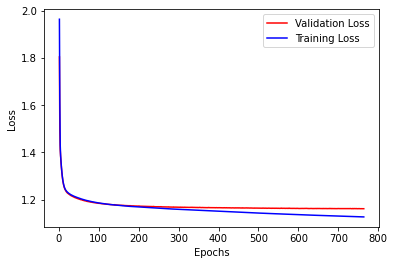

In [110]:
val_loss = history_retrieval_rain.history["val_loss"]
loss = history_retrieval_rain.history["loss"]

epochs = range(1, 765)
plt.plot(epochs, val_loss[:], "r-",
label="Validation Loss")
plt.plot(epochs, loss[:], "b-",
label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [111]:
predictions_rain = model_retrieval_rain.predict(Xf_rain_tst_retrieval)

### Evaluation

In [112]:
model_retrieval_rain.evaluate(Xf_rain_tst_retrieval, yf_rain_tst_retrieval, batch_size = batch_size2)

125/125 [==============================] - 0s 582us/step - loss: 1.1995 - root_mean_squared_error: 3.2355


[1.1995289325714111, 3.2354979515075684]

# Checking Outputs

In [113]:
from scipy.stats import gaussian_kde
x = yf_rain_tst_retrieval
y = predictions_rain
idx_snow = (x>0) & (y>0)
mask_TP=idx_snow[:,0]
y = np.delete(y, ~mask_TP)
x = np.delete(x, ~mask_TP)
xy = np.vstack([np.log(x),np.log(y)])
z = gaussian_kde(xy)(xy)

In [114]:
rmse = np.sqrt(np.mean(np.square(x-y)))
mae = np.mean(np.abs(x-y))
bias = np.sum(y-x)/len(x)
print('RMSE rain:', rmse, 'mm/hr')
print('MAE rain:', mae, 'mm/hr')
print('bias rain:', bias, 'mm/hr')

RMSE rain: 3.280741179540019 mm/hr
MAE rain: 1.198190215311161 mm/hr
bias rain: -0.5867853468287341 mm/hr


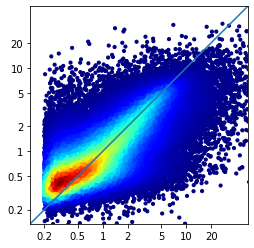

In [115]:
fig, ax = plt.subplots()
ax.scatter(np.log(x), np.log(y), c=z, s=10, cmap= 'jet')
plt.plot([-2, 4], [-2, 4])
ax.set_xlim(-2, 4)
ax.set_ylim(-2, 4)
ax.set_aspect('equal', adjustable='box')
ax.set_xticks([np.log(0.2), np.log(0.5), np.log(1), np.log(2) , np.log(5) , np.log(10) , np.log(20)])
ax.set_xticklabels(['0.2','0.5', '1', '2', '5', '10', '20'])
ax.set_yticks([np.log(0.2), np.log(0.5), np.log(1), np.log(2), np.log(5) , np.log(10), np.log(20)])
ax.set_yticklabels(['0.2','0.5', '1', '2', '5', '10', '20'])
plt.show()

## Save Files

In [66]:
import scipy
from scipy.io import savemat

In [119]:
import scipy
from scipy.io import savemat

fp_DNN_rain_detection = 'label_pred_rain_land_DPR_nn20.mat'
fp_actual_rain_detection = 't_test_label_rain_land_DPR_nn20.mat'
scipy.io.savemat(fp_DNN_rain_detection, {'label_pred_rain_land_DPR': y_pred_rain})
scipy.io.savemat(fp_actual_rain_detection, {'t_test_label_rain_land_DPR': tf_test_rain})

fp_DNN_snow_detection = 'label_pred_snow_land_DPR_nn20.mat'
fp_actual_snow_detection = 't_test_label_snow_land_DPR_nn20.mat'
scipy.io.savemat(fp_DNN_snow_detection, {'label_pred_snow_land_DPR': y_pred_snow})
scipy.io.savemat(fp_actual_snow_detection, {'t_test_label_snow_land_DPR': tf_test_snow})

fp_DNN_snow_retrieval = 'rate_pred_snow_land_DPR_nn20.mat'
fp_actual_snow_retrieval = 't_test_rate_snow_land_DPR_nn20.mat'
scipy.io.savemat(fp_DNN_snow_retrieval, {'rate_pred_snow_land_DPR': predictions_snow})
scipy.io.savemat(fp_actual_snow_retrieval, {'t_test_rate_snow_land_DPR': yf_snow_tst_retrieval})

fp_DNN_rain_retrieval = 'rate_pred_rain_land_DPR_nn20.mat'
fp_actual_rain_retrieval = 't_test_rate_rain_land_DPR_nn20.mat'
scipy.io.savemat(fp_DNN_rain_retrieval, {'rate_pred_rain_land_DPR': predictions_rain})
scipy.io.savemat(fp_actual_rain_retrieval, {'t_test_rate_rain_land_DPR': yf_rain_tst_retrieval})

In [117]:
model_detection.save('Models\DPR\Land\model_dtc',save_format='h5')
model_retrieval_snow.save('Models\DPR\Land\model_snow_lb',save_format='h5')
model_retrieval_rain.save('Models\DPR\Land\model_rain',save_format='h5')

In [35]:
import scipy
from scipy.io import savemat

fp_DPR_land = 'Models/DPR/Land/files_DPR_land.mat'
scipy.io.savemat(fp_DPR_land, {'mean_detection_DPR_land': mean_detection,'std_detection_DPR_land':std_detection,
                               'mean_snow_retrieval_DPR_land': mean_snow_retrieval,'std_snow_retrieval_DPR_land':std_snow_retrieval,
                               'mean_rain_retrieval_DPR_land': mean_rain_retrieval,'std_rain_retrieval_DPR_land':std_rain_retrieval})


## Observation Orbits

In [ ]:
g = h5py.File("Orbital/Orbit6308_dics.mat",'r')
list(g.keys())

In [ ]:
X0_detection = g['X_detection']
X1_detection = np.transpose(X0_detection)
X2_detection = np.transpose(X1_detection)

X0_snow_retrieval = g['x_retrieval_DPR_snow_land']
X1_snow_retrieval = np.transpose(X0_snow_retrieval)

X0_rain_retrieval = g['x_retrieval_DPR_rain_land']
X1_rain_retrieval = np.transpose(X0_rain_retrieval)

In [ ]:
X3_detection = X2_detection-mean_detection
X_detection = X3_detection/std_detection

X2_snow_retrieval = X1_snow_retrieval-mean_snow_retrieval
X_snow_retrieval = X2_snow_retrieval/std_snow_retrieval

X2_rain_retrieval = X1_rain_retrieval-mean_rain_retrieval
X_rain_retrieval = X2_rain_retrieval/std_rain_retrieval

In [ ]:
label_pred_obs = model_detection.predict(X_detection)

In [ ]:
y_pred_obs = np.zeros([len(X_detection),1])
for i in range(len(X_detection)):
    y_pred_obs[i,0] = np.argmax(label_pred_obs[i])

In [ ]:
rate_snow_pred_obs = model_retrieval_snow.predict(X_snow_retrieval)
rate_rain_pred_obs = model_retrieval_rain.predict(X_rain_retrieval)

In [ ]:
import scipy
from scipy.io import savemat

fp_detection = 'label_pred_land_DPR_6308.mat'
fp_snow_retrieval = 'rate_snow_pred_land_DPR_6308.mat'
fp_rain_retrieval = 'rate_rain_pred_land_DPR_6308.mat'

scipy.io.savemat(fp_detection, {'label_pred_land_DPR': y_pred_obs})
scipy.io.savemat(fp_snow_retrieval, {'rate_snow_pred_land_DPR': rate_snow_pred_obs})    
scipy.io.savemat(fp_rain_retrieval, {'rate_rain_pred_land_DPR': rate_rain_pred_obs})